In [1]:
#importing the pandas library here
import pandas as pd 
#matplotlib is a plotting library in Python that provides tools for creatinginteractive visualizations in Python.
from matplotlib import pyplot as plt
#The datetime module provides various classes for manipulating dates and times
from datetime import datetime
#This library is for estimating various statistical models, performing statistical tests, and analyzing statistical data
import statsmodels.api as sm
import matplotlib
#importing pyplot as plt from the library matplotlib
import matplotlib.pyplot as plt 
#dates module provides functions for working with dates in Matplotlib
import matplotlib.dates as mdates
import numpy as np
#An autoregressive (AR) model is a type of statistical model 
#that uses past observations to predict future values of a time series
from statsmodels.tsa.ar_model import AutoReg



#We need to load the Air Passengers Dataset into a dataframe using the pandas library
dataframe = pd.read_csv('airpassengers.csv')

#taking a glimpse at the data
dataframe

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
#Visualizing the first 5 rows of the dataset
dataframe.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Checking if there is any null values within the dataset
dataframe.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
#now we know that in a csv a date is evaluated as string, so we use this command to turn it into a date
dataframe['Month'] = pd.to_datetime(dataframe['Month'])


In [5]:
#Visualizing the data again
dataframe.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
#Checking the type of the Month Column ==> Its of object Date
dataframe.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
#The .dt accessor allows you to access the properties of a datetime column like year, month, day, etc.
dataframe['Month'].dt.year.head()

0    1949
1    1949
2    1949
3    1949
4    1949
Name: Month, dtype: int64

In [8]:
#By setting the 'Month' column as the index, it makes it easier to perform time-based operations and analyses on the data.
#This is useful when you want to make the month column as the x-axis of the plot and make time series analysis.
dataframe = dataframe.set_index('Month')
dataframe.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


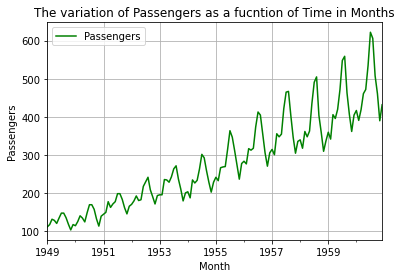

In [9]:
#Data Visualization

dataframe.plot(c = 'green')
plt.title('The variation of Passengers as a fucntion of Time in Months')
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.grid()
plt.show() 

#As we see here, the trend of this graph is increasing 

In [10]:
# calculate the mean: The average value of the time series data. It can be affected by outliers
mean = np.mean(dataframe.Passengers)
# calculate the median: The middle value of the time series data.
median = np.median(dataframe.Passengers)
# calculate the mode: The most frequent value of the time series data.
mode = pd.Series(dataframe.Passengers).mode()
# calculate the variance: A measure of the spread of the data.
variance = np.var(dataframe.Passengers)
# calculate the standard deviation: The square root of the variance
std = np.std(dataframe.Passengers)
#calculate the skewness: A measure of the asymmetry of the distribution of the data.
#A positive skewness indicates that the data is positively skewed,
#and a negative skewness indicates that the data is negatively skewed.
skewness = pd.Series(dataframe.Passengers).skew()
# calculate the kurtosis:  measure of the peakedness of the distribution of the data. 
#A high kurtosis indicates that the data is peaked, and a low kurtosis indicates that the data is flat.
kurtosis = pd.Series(dataframe.Passengers).kurt()
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('\n')
print('Mode:', mode)
print('\n')
print('Variance: {:.2f}'.format(variance))
print('Standard Deviation: {:.2f}'.format(std))
print('Skewness: {:.2f}'.format(skewness))
print('Kurtosis: {:.2f}'.format(kurtosis))

Mean: 280.30
Median: 265.50


Mode: 0    229
Name: Passengers, dtype: int64


Variance: 14291.97
Standard Deviation: 119.55
Skewness: 0.58
Kurtosis: -0.36


In [11]:
dataframe.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Text(0, 0.5, 'Passengers')

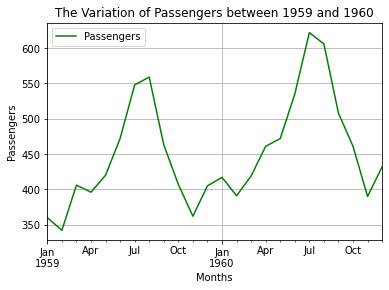

In [12]:
#specifying 2 dates between 1959 and 1960
startdate = datetime(1959, 1, 1)
enddate = datetime(1960, 12, 1)

#Plotting the dataframe.index which is the Month, as a fnction of these 2 intervals
dataframe[(startdate <= dataframe.index) & (dataframe.index <= enddate)].plot(grid = 'on', c = 'green')

#the plt.grid() fct is to show grids behind the graph drawn
plt.title('The Variation of Passengers between 1959 and 1960')
plt.xlabel('Months')
plt.ylabel('Passengers')

#As shown in this graph, there is a seasonality that spikes massively between april and october which is the summer and vacation times.
#There is also a small spike between november and january because of the holidays.

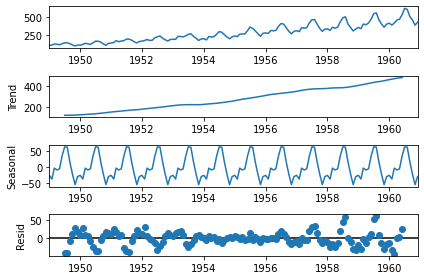

In [13]:
#performing a seasonal decomposition on a time series data
decomposition_techn = sm.tsa.seasonal_decompose(dataframe, model = 'additive')


fig = decomposition_techn.plot()

#First Graph is the observed graph, which shows the normal plotted graph
#The second graph shows the trend which as we can see is increasing 
#The third graph shows the seasonality, which we took a closer look at it in the previous piece of code
#The fourth graph shows the residual components random variation or noise in the time series data that is not captured
#by the trend and seasonal patterns. 


<font size="4">Yt = mt + st + et</font>

<font size = "3">where mt is the trend, st is the seasonality, and et is the random component.</font>


In [14]:
#this line of code is setting the default size of the plots created by Matplotlib to be 10 inches wide and 5 inches tall
matplotlib.rcParams['figure.figsize'] = [10.0, 5.0]

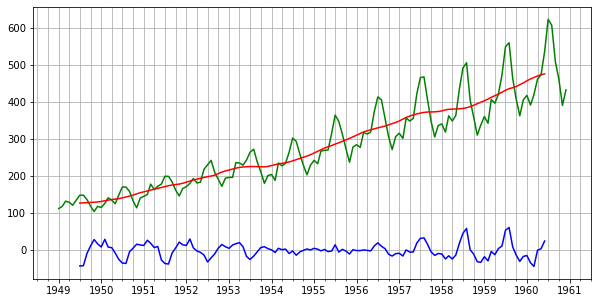

In [15]:
#creates a figure and an axes object using the subplots() function from the Matplotlib library's pyplot module (plt).
fig, ax = plt.subplots()
ax.grid(True)


#set the x-axis to show the months on the grid behind
month = mdates.MonthLocator(interval = 3)
ax.xaxis.set_minor_locator(month)


ax.xaxis.grid(True, which = 'minor')
year = mdates.YearLocator(month = 1)
ax.xaxis.set_major_locator(year)

#Plotting the dataframe
plt.plot(dataframe.index, dataframe['Passengers'], c = 'green')
plt.plot(decomposition_techn.trend.index, decomposition_techn.trend, c = 'red')
plt.plot(decomposition_techn.resid.index, decomposition_techn.resid, c = 'blue')


<font size="4" color = 'green'>The Green Graph shows the observed graph with the whole dataset</font>

<font size="4" color = 'red'>The Red Graph is the trend, which shows an increase alongside the observed graph</font>

<font size="4" color = 'blue'>The Blue graph is the residual components</font>


In [16]:
#A simple moving average (SMA) is a statistical method that calculates the average of a set of data over a 
#specified time period, usually a number of time periods. 
#It is used to smooth out fluctuations in a time series data, making it easier to observe trends and patterns.

dataframe['Moving_Average'] = dataframe['Passengers'].rolling(window=14).mean()

#This is a smoothing technique

In [17]:
dataframe.head(15)

,Passengers,Moving_Average
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


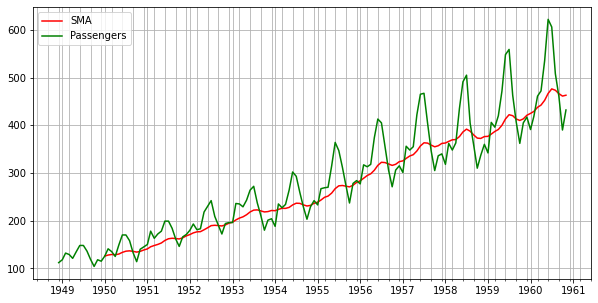

In [18]:
#creates a figure and an axes object using the subplots() function from the Matplotlib library's pyplot module (plt).
fig, x = plt.subplots()
x.grid(True)


#set the x-axis to show the months on the grid behind
month = mdates.MonthLocator(interval = 3)
x.xaxis.set_minor_locator(month)


x.xaxis.grid(True, which = 'minor')
year = mdates.YearLocator(month = 2)
x.xaxis.set_major_locator(year)

plt.plot(dataframe.index, dataframe['Moving_Average'], c = 'red')
plt.plot(dataframe.index, dataframe['Passengers'], c = 'green')
plt.legend(['SMA', 'Passengers'])

#bullish trend
#the values of the data points in this time series are generally increasing over time

												AR-AutoRegression

In [19]:
# select the column to perform the autoregression on
data = dataframe['Passengers']

# create the autoregression model
#The number of past values used in the model is called the "order"/"Lags" of the autoregression. For example, if the order is 2, 
#the model would use the current value and the value from the previous time step to predict the next value.
model = AutoReg(data, lags=60) 

# fit the model
model_fit = model.fit()

# make a prediction
predictions = model_fit.predict(start=len(data), end=len(data)+20)
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Values'])
predictions_df

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,Predicted_Values
1961-01-01,456.858106
1961-02-01,396.000321
1961-03-01,438.980736
1961-04-01,472.563849
1961-05-01,476.829305
1961-06-01,580.764921
1961-07-01,673.875020
1961-08-01,642.318774
1961-09-01,530.147760
1961-10-01,475.854675


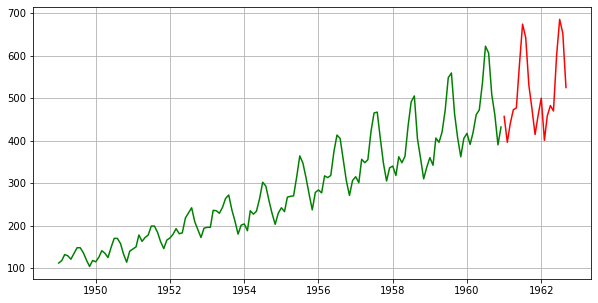

In [20]:
#Now Plotting both the original data and the predictions to see how the graph would look
plt.plot(dataframe.index, dataframe['Passengers'], c = 'green')
plt.plot(predictions_df.index, predictions_df.Predicted_Values, c = 'red')
plt.grid()